This notebook was initially meant to take in the arxiv data and perform
  - vectorization
  - information weight transform
  - UMAP
    
  and save the output to .npy format for easy import to other notebooks.

**Update:** We probably want to use a standard encoder, such as mpnet. 

Basic usage in next cell.

In [1]:
#pip install --upgrade pip

In [1]:
#pip install numpy==1.26.4 # compatible version with sentence transformers

In [3]:
#pip install -U sentence-transformers

In [ ]:
#pip install -U ipywidgets

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
# Then you can use the model like this:
sentences = ["This is an example sentence", "Each sentence is converted"]
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
print(embeddings)

[[ 0.02250258 -0.07829178 -0.02303074 ... -0.00827928  0.02652695
  -0.00201898]
 [ 0.04170238  0.00109739 -0.01553418 ... -0.02181627 -0.06359355
  -0.00875283]]


In [ ]:
embeddings.shape

In [3]:
# Sample useage
sentences = ["hello world", "goodbye dog"]
embeddings = model.encode(sentences)
print(embeddings)

[[ 0.0262497   0.01339561 -0.00453316 ...  0.03553402 -0.03079692
  -0.01055144]
 [-0.00859254  0.03205366 -0.01656716 ...  0.06571209  0.01012373
  -0.02159733]]


### Read in ArXiv data and convert abstract into embeddings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from unidecode import unidecode
import ast

In [4]:
df = pd.read_csv("arXivScrape_filtered.csv")

In [5]:
df.shape

(9308, 9)

In [6]:
df.head(10)

,id,title,categories,abstract,doi,created,updated,authors,authorsRL
0,1909.07458,higher dimensional cardinal characteristics fo...,math.lo,much recent work in cardinal characteristics h...,NaN,2019-09-16,2021-08-31,['corey bacal switzer'],['corey bacal switzer']
1,2109.00569,interpretable fields in various valued fields,math.lo math.ac,"let $\mathcal{k}=(k,v,\ldots)$ be a dp-minimal...",NaN,2021-09-01,NaN,"['yatir halevi', 'assaf hasson', ""ya'acov pete...","['yatir halevi', ""ya'acov peterzil""]"
2,2109.00736,tukey-order with models on pawlikowski's theorems,math.lo,"in j. symbolic logic,51(4): 957-968, 1986, paw...",NaN,2021-09-02,NaN,['miguel a. cardona'],['miguel a. cardona']
3,2109.02548,finitely axiomatized theories lack self-compre...,math.lo,in this paper we prove that no consistent fini...,NaN,2021-09-06,NaN,"['fedor pakhomov', 'albert visser']","['fedor pakhomov', 'albert visser']"
4,2107.14329,on pp elimination and stability in a continuou...,math.lo,"we generalize pp elimination for modules, or m...",NaN,2021-07-29,2021-09-08,"['nicolas chavarria gomez', 'anand pillay']",['anand pillay']
5,2109.03911,model theory and groups,math.lo,this is a largely expository paper about how g...,NaN,2021-09-08,NaN,['anand pillay'],['anand pillay']
6,1811.12827,effectively constructible fixed points in sacc...,math.lo,we give a purely syntactical proof of the fixe...,NaN,2018-11-30,2021-09-13,"['taishi kurahashi', 'yuya okawa']",['taishi kurahashi']
7,2010.02034,fraisse classes with simply characterized big ...,math.co math.lo,we formulate a property strengthening the disj...,NaN,2020-10-05,2021-09-12,"['rebecca coulson', 'natasha dobrinen', 'rehan...",['natasha dobrinen']
8,2102.02483,topological semantics of conservativity and in...,math.lo,we introduce and develop a topological semanti...,10.1093/logcom/exab046,2021-02-04,2021-09-13,"['sohei iwata', 'taishi kurahashi']",['taishi kurahashi']
9,2109.06040,taming the `elsewhere': on expressivity of top...,math.lo,"in topological modal logic, it is well known t...",NaN,2021-09-13,NaN,['david fernandez-duque'],['david fernandez-duque']


In [6]:
df['authorsRL'] = df['authorsRL'].apply(ast.literal_eval)

In [6]:
#df[['quanquan gu' in x for x in df['authors']]]

In [7]:
ent_rec = Counter([x for y in df['authorsRL'] for x in y])

In [25]:
#ent_rec

(array([112., 107.,  68.,  21.,  16.,  42.,  14.,  11.,  11.,   9.,   1.,
          2.,   0.,   3.,   0.,   0.,   2.,   0.,   0.,   2.]),
 array([  6.  ,  13.55,  21.1 ,  28.65,  36.2 ,  43.75,  51.3 ,  58.85,
         66.4 ,  73.95,  81.5 ,  89.05,  96.6 , 104.15, 111.7 , 119.25,
        126.8 , 134.35, 141.9 , 149.45, 157.  ]),
 <BarContainer object of 20 artists>)

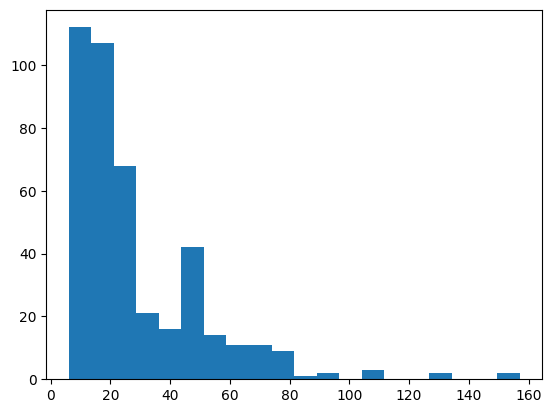

In [8]:
plt.hist(ent_rec.values(), bins = 20)

In [7]:
abstract = df["abstract"]

In [75]:
title = df["title"]

In [76]:
sentences = title + " " + abstract

In [77]:
sentences[0]

'on pp elimination and stability in a continuous setting we generalize pp elimination for modules, or more generally abelian structures, to a continuous logic environment where the abelian structure is equipped with a homomorphism to a compact (hausdorff) group. we conclude that the continuous logic theory of such a structure is stable.'

In [37]:
len(sentences.str.split()[0])

112

In [38]:
len(sentences[0]) # approx characters with spaces

852

In [22]:
word_count = []
for x in sentences:
    word_count.append(len(x))

In [24]:
#plt.hist(word_count) # By default, input text longer than 384 word pieces is truncated

In [27]:
df_shuffled = df.sample(frac = 1, random_state = 0).reset_index(drop = True)
df_shuffled.head(10)

,id,title,categories,abstract,doi,created,updated,authors,authorsRL
0,1712.04755,exponential convergence of testing error for s...,cs.lg stat.ml,we consider binary classification problems wit...,NaN,2017-12-13,2018-11-20,"['loucas pillaud-vivien', 'alessandro rudi', '...","[alessandro rudi, francis bach]"
1,2006.00739,the importance of cognitive domains and the re...,econ.gn q-fin.ec,numerous studies have considered the important...,10.1016/j.labeco.2020.101849,2020-06-01,2020-06-05,"['plamen nikolov', 'nusrat jimi']",[plamen nikolov]
2,1806.01660,towards understanding acceleration tradeoff be...,cs.lg stat.ml,asynchronous momentum stochastic gradient desc...,NaN,2018-06-04,2021-01-13,"['tianyi liu', 'shiyang li', 'jianping shi', '...",[tuo zhao]
3,2106.12059,stochastic batch acquisition: a simple baselin...,cs.lg stat.ml,we examine a simple stochastic strategy for ad...,NaN,2021-06-22,2023-09-19,"['andreas kirsch', 'sebastian farquhar', 'parm...",[yarin gal]
4,2010.01279,do wider neural networks really help adversari...,cs.lg cs.ai stat.ml,adversarial training is a powerful type of def...,NaN,2020-10-03,2021-08-14,"['boxi wu', 'jinghui chen', 'deng cai', 'xiaof...",[quanquan gu]
5,2301.11674,optimally-weighted estimators of the maximum m...,stat.me stat.co stat.ml,likelihood-free inference methods typically ma...,NaN,2023-01-27,2023-05-10,"['ayush bharti', 'masha naslidnyk', 'oscar key...",[samuel kaski]
6,2303.00406,graphene-quantum dot hybrid photodetectors fro...,cond-mat.mes-hall physics.app-ph,a 200 mm processing platform for the large-sca...,NaN,2023-03-01,NaN,"['sha li', 'zhenxing wang', 'bianca robertz', ...",[max c. lemme]
7,1909.12247,minimal equivalence relations in hyperarithmet...,math.lo,a standard tool for classifying the complexity...,NaN,2019-09-26,NaN,"['nikolay bazhenov', 'manat mustafa', 'luca sa...","[nikolay bazhenov, luca san mauro]"
8,2205.15113,online agnostic multiclass boosting,cs.lg stat.ml,boosting is a fundamental approach in machine ...,NaN,2022-05-30,2022-10-17,"['vinod raman', 'ambuj tewari']",[ambuj tewari]
9,2002.00291,oracle lower bounds for stochastic gradient sa...,stat.ml cs.lg math.st stat.th,we consider the problem of sampling from a str...,NaN,2020-02-01,2021-07-03,"['niladri s. chatterji', 'peter l. bartlett', ...",[peter l. bartlett]


In [28]:
df_shuffled.to_csv('arXivScrape_shuffled.csv', index = False)

In [8]:
#sentences = df_shuffled["abstract"]
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(abstract, show_progress_bar = True, convert_to_tensor = True, 
                          normalize_embeddings = True)
#print(embeddings)

Batches:   0%|          | 0/291 [00:00<?, ?it/s]

In [20]:
#df.head(11)

In [19]:
#sentences[0]

'we generalize pp elimination for modules, or more generally abelian structures, to a continuous logic environment where the abelian structure is equipped with a homomorphism to a compact (hausdorff) group. we conclude that the continuous logic theory of such a structure is stable.'

In [9]:
embeddings.shape

torch.Size([9308, 768])

In [10]:
model.similarity_fn_name

'cosine'

In [11]:
cosine_data = model.similarity(embeddings, embeddings)

In [16]:
1 - cosine_data[0:5, 0:5]

tensor([[ 0.0000e+00,  4.5709e-01,  4.8528e-01,  5.0774e-01,  6.5547e-01],
        [ 4.5709e-01, -1.1921e-07,  6.6598e-01,  6.0808e-01,  6.7825e-01],
        [ 4.8528e-01,  6.6598e-01,  5.9605e-08,  4.9285e-01,  7.5638e-01],
        [ 5.0774e-01,  6.0808e-01,  4.9285e-01, -2.3842e-07,  6.9339e-01],
        [ 6.5547e-01,  6.7825e-01,  7.5638e-01,  6.9339e-01,  1.7881e-07]])

In [12]:
from scipy.spatial import distance_matrix

In [13]:
dist_data = distance_matrix(embeddings, embeddings)

In [17]:
dist_data[0:5, 0:5]

array([[0.        , 0.95612918, 0.98517069, 1.00770676, 1.14495995],
       [0.95612918, 0.        , 1.15410201, 1.10279704, 1.16468895],
       [0.98517069, 1.15410201, 0.        , 0.99282578, 1.22994388],
       [1.00770676, 1.10279704, 0.99282578, 0.        , 1.17762014],
       [1.14495995, 1.16468895, 1.22994388, 1.17762014, 0.        ]])

In [14]:
pd.DataFrame(dist_data).to_csv('arXivScrape_dist.csv', index = False, header = False)

In [15]:
pd.DataFrame(cosine_data).to_csv('arXivScrape_cos.csv', index = False, header = False)

In [127]:
#import torch

In [130]:
#dist_data = torch.cdist(embeddings, embeddings, p = 2)[0:5, 0:5]

# Original notebook below here

In [ ]:
#pip install pyarrow

In [ ]:
#pip install vectorizers

In [ ]:
import pyarrow.feather as feather
import pyarrow.feather as feather
import vectorizers
from vectorizers.transformers import InformationWeightTransformer
import umap
import numpy as np
import pandas as pd

In [ ]:
# Import feather file as Pandas Dataframe
arxiv_df = feather.read_feather('arxiv/all_arxiv_papers_df.feather')

In [ ]:
# Concatenate the abstracts & titles together, which will be our 'documents'; then split into lists of words.
arxiv_df["concat"] = arxiv_df["title"] + " " + arxiv_df["abstract"]
arxiv_df["split"] =arxiv_df["concat"].str.split()
list_of_word_bags = arxiv_df["split"].tolist()
total = len(list_of_word_bags)
print("Number of items:", total) 

# Compute a time column which is the number of days since Jan 01, 2018.
def date_to_T(date):
    year = date.year
    ## 2020 was a leap year
    if year > 2020:
        return date.timetuple().tm_yday + 365*(year-2018)+1
    else:
        return date.timetuple().tm_yday + 365*(year-2018)

arxiv_df["date"] = pd.to_datetime(arxiv_df["created"])
arxiv_df["created-days since Jan 01, 1018"] = arxiv_df["date"].apply(
    lambda x: date_to_T(x)
)

In [ ]:
arxiv_df

In [ ]:
# Vectorize the documents
list_of_word_bags = arxiv_df["split"].tolist()

vectorizer = vectorizers.NgramVectorizer()
count_vectors=vectorizer.fit_transform(list_of_word_bags)

In [ ]:
# Perform IWT
IWT=InformationWeightTransformer()
info_vectors=IWT.fit_transform(count_vectors)

In [ ]:
# UMAP
datamap = umap.UMAP(n_components = 2, metric="hellinger", unique=True).fit_transform(info_vectors)
datamap

In [ ]:
arxiv_df["2d-vector"] = list(datamap)

In [ ]:
arxiv_df.to_feather("all_arxiv_papers_preprocessed.feather")